In [2]:
import fish_models
import robofish.io

import numpy as np
from pathlib import Path

In [3]:
bins = 5
raycast_options = {
    "n_fish_bins": bins,
    "n_wall_raycasts": bins,
    "fov_angle_fish_bins": 2 * np.pi,
    "fov_angle_wall_raycasts": 2 * np.pi,
    "world_bounds": ([-50, -50], [50, 50]),
    # "far_plane": 142,
}

# Raycast in cm
raycast = fish_models.gym_interface.Raycast(**raycast_options)

# IO Files in cm, actions in m/s
data_folder = Path("/home/andi/mnt/trackdb_offline/trainingdata/live_female_female/train")
dset = fish_models.datasets.io_dataset.IoDataset(data_folder, raycast, output_strings=["views", "actions"], reduce_dim=2, max_files=1)

  0%|          | 0/1 [00:00<?, ?it/s]

Loading data from 1 files.
Calculating views from 1 files.


100%|██████████| 1/1 [00:01<00:00,  1.10s/it]

Created IoDataset:
Reduced the first 3 dimensions from (1, 2, 8989) to (17976)
views	(17976, 10):	5 fish_bins and 5 wall ray casts.
actions	(17976, 2):	consisting of speed[cm/s] and turn [rad/s].



In [4]:
import importlib
importlib.reload(fish_models)

model = fish_models.models.andi.lookup_model.LookupModel(tau=0.01)
model.train(dset)

In [5]:
generator = fish_models.gym_interface.TrackGeneratorGymRaycast(
    model, raycast, dset.world_size, dset.frequency
)

# initial_poses = dset.poses[0, :, 0]
timesteps = 1500
initial_poses = np.array([[0.0, 0.0, 0.0], [0.0, 3.0, 0.0]])
track = generator.create_track(2, timesteps, initial_poses=initial_poses)
f = generator.asIoFile(track)
# f.save_as("__generated.hdf5")

/home/andi/.local/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
  0%|          | 7/1499 [00:00<00:22, 66.23it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.97879 0.      0.64645 0.64645 0.64645 0.64645
 0.64645]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.97879 0.      0.      0.      0.64645 0.62523 0.64645 0.66766
 0.64645]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.97855 0.      0.642   0.64602 0.65036 0.64634
 0.642  ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.97855 0.      0.      0.      0.64062 0.62051 0.64384 0.66395
 0.64062]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.97822 0.      0.63952 0.64502 0.6511  0.6456
 0.63952]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.97822 0.      0.      0.      0.6333  0.61472 0.64125 0.65983
 0.6333 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.97762 0.      0.63774 0.64561 0.65429 0.64643
 0.63774]
(10,) <class 'tuple'>
(17976, 10) <c

  2%|▏         | 23/1499 [00:00<00:21, 68.21it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.96579 0.60439 0.64257 0.68696 0.64877
 0.60439]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.96579 0.      0.      0.      0.57652 0.57023 0.6419  0.64819
 0.57652]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.96302 0.58911 0.63384 0.68277 0.63804
 0.58911]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.96302 0.      0.      0.      0.57009 0.56522 0.64182 0.64668
 0.57009]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.96148 0.5867  0.63362 0.6839  0.63698
 0.5867 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.96148 0.      0.      0.      0.5437  0.53968 0.6252  0.62921
 0.5437 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.96009 0.59451 0.64296 0.69414 0.6457
 0.59451]
(10,) <class 'tuple'>
(17976, 10) <c

  2%|▏         | 37/1499 [00:00<00:21, 66.70it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.94618 0.56446 0.64182 0.71578 0.63842
 0.56446]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.94618 0.      0.      0.      0.53588 0.54837 0.67411 0.66162
 0.53588]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.94393 0.51989 0.60905 0.69157 0.60241
 0.51989]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.94393 0.      0.      0.      0.54411 0.55749 0.68344 0.67005
 0.54411]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.94149 0.47525 0.57884 0.66964 0.56605
 0.47525]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.94149 0.      0.      0.      0.57984 0.59483 0.71296 0.69797
 0.57984]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.94084 0.51656 0.6156  0.70024 0.6012
 0.51656]
(10,) <class 'tuple'>
(17976, 10) <c

  3%|▎         | 52/1499 [00:00<00:21, 67.81it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.93543 0.      0.53593 0.65073 0.74651 0.63172
 0.53593]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.93543 0.      0.      0.      0.51102 0.55844 0.72478 0.67736
 0.51102]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.93421 0.52453 0.64474 0.74422 0.62402
 0.52453]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.93421 0.      0.      0.      0.50842 0.55668 0.7252  0.67694
 0.50842]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.93324 0.50414 0.63101 0.73528 0.60841
 0.50414]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.93324 0.      0.      0.      0.52747 0.57518 0.73913 0.69142
 0.52747]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.93202 0.48454 0.61944 0.72858 0.59367
 0.48454]
(10,) <class 'tuple'>
(17976, 10) <

  4%|▍         | 66/1499 [00:00<00:22, 64.77it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.92066 0.      0.50083 0.65529 0.77686 0.62241
 0.50083]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.92066 0.      0.      0.      0.      0.45253 0.52654 0.74365 0.66963
 0.45253]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.91996 0.      0.50906 0.66212 0.78277 0.62971
 0.50906]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.91996 0.      0.      0.      0.      0.45478 0.52892 0.74652 0.67239
 0.45478]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.91727 0.38759 0.58181 0.73234 0.63877
 0.38759]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.91727 0.      0.      0.      0.      0.41723 0.59941 0.73261 0.6529
 0.41723]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.91396 0.42605 0.56083 0.72089 0.67502
 0.42605]
(10,) <class 'tuple'>
(17976, 10) <c

  5%|▌         | 80/1499 [00:01<00:22, 61.98it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.88363 0.54027 0.40831 0.63173 0.76235
 0.54027]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.88363 0.      0.      0.      0.      0.5401  0.78389 0.71584 0.47205
 0.5401 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.87914 0.51455 0.46873 0.66978 0.7524
 0.51455]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.87914 0.      0.      0.      0.      0.52872 0.7807  0.71288 0.46089
 0.52872]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.87345 0.53173 0.42533 0.64299 0.76499
 0.53173]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.87345 0.55177 0.79229 0.73152 0.491
 0.55177]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.86795 0.51644 0.4609  0.6654  0.76013
 0.51644]
(10,) <class 'tuple'>
(17976, 10) <cla

  6%|▋         | 94/1499 [00:01<00:22, 62.97it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.82506 0.50677 0.77899 0.75498 0.48276
 0.50677]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.82019 0.39579 0.66367 0.81447 0.62698
 0.39579]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.82019 0.      0.      0.      0.      0.51777 0.78462 0.76429 0.49744
 0.51777]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.81697 0.42424 0.68241 0.82741 0.56924
 0.42424]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.81697 0.      0.      0.      0.      0.51759 0.78494 0.76631 0.49896
 0.51759]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.81266 0.4344  0.6909  0.83508 0.57858
 0.4344 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.81266 0.      0.      0.      0.      0.51316 0.78363 0.76791 0.49744
 0.51316]
(10,) <class 'tuple'>
(17976, 10) <

  7%|▋         | 101/1499 [00:01<00:21, 63.64it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.7864  0.      0.      0.      0.      0.48493 0.78309 0.79067 0.49251
 0.48493]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.78443 0.      0.49084 0.77467 0.83225 0.49751
 0.49084]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.78443 0.      0.      0.      0.      0.49379 0.78807 0.79795 0.50366
 0.49379]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.78357 0.      0.58381 0.82075 0.80456 0.40765
 0.58381]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.78357 0.      0.      0.      0.      0.49037 0.788   0.8004  0.50278
 0.49037]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.78245 0.      0.5243  0.80038 0.8296  0.47637
 0.5243 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.78245 0.      0.      0.      0.      0.48624 0.78758 0.80223 0.50088
 0.48624]
(10,) <class 'tuple'>
(17976, 10) <

  8%|▊         | 115/1499 [00:01<00:22, 62.86it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.76436 0.      0.      0.      0.      0.45964 0.78582 0.82775 0.50157
 0.45964]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.7628  0.      0.38895 0.79568 0.8717  0.54874
 0.38895]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.7628  0.      0.      0.      0.      0.44193 0.7804  0.82525 0.48679
 0.44193]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.76101 0.      0.4268  0.81066 0.86927 0.53649
 0.4268 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.76101 0.      0.      0.      0.      0.4165  0.77275 0.82119 0.55605
 0.4165 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.76111 0.      0.49489 0.83937 0.86257 0.50156
 0.49489]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.76111 0.      0.      0.      0.      0.40054 0.76782 0.81825 0.61301
 0.40054]
(10,) <class 'tuple'>
(17976, 10) <

  9%|▊         | 130/1499 [00:01<00:20, 66.94it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.75162 0.      0.54678 0.88832 0.86208 0.43606
 0.54678]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.75162 0.      0.      0.      0.      0.38694 0.78361 0.85557 0.62404
 0.38694]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.75176 0.      0.5154  0.88459 0.876   0.48279
 0.5154 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.75176 0.      0.      0.      0.      0.39377 0.787   0.85893 0.58742
 0.39377]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.74881 0.      0.54971 0.89356 0.86325 0.4273
 0.54971]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.74881 0.      0.      0.      0.      0.41468 0.79646 0.86886 0.48707
 0.41468]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.74779 0.      0.57791 0.90319 0.84459 0.34023
 0.57791]
(10,) <class 'tuple'>
(17976, 10) <c

 10%|▉         | 148/1499 [00:02<00:18, 74.70it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.75425 0.      0.      0.84533 0.86756 0.58859 0.39331
 0.84533]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.75425 0.      0.      0.      0.      0.37711 0.79007 0.90772 0.49475
 0.37711]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.75505 0.      0.      0.86737 0.83494 0.50469 0.4909
 0.86737]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.75505 0.      0.      0.      0.      0.37372 0.78938 0.91011 0.49445
 0.37372]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.75669 0.      0.      0.87224 0.80499 0.43802 0.52284
 0.87224]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.75669 0.      0.      0.      0.      0.36435 0.78644 0.911   0.4889
 0.36435]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.75534 0.      0.      0.87437 0.78329 0.38804 0.53743
 0.87437]
(10,) <class 'tuple'>
(17976, 10) <cl

 11%|█         | 164/1499 [00:02<00:18, 71.31it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.75195 0.43031 0.8762  0.94594 0.47717
 0.43031]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.75236 0.      0.      0.71409 0.85232 0.69076 0.35181
 0.71409]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.75236 0.      0.      0.      0.      0.38892 0.874   0.94909 0.48425
 0.38892]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.75399 0.      0.      0.77272 0.83419 0.66455 0.29053
 0.77272]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.75399 0.53901 0.91061 0.94843 0.44961
 0.53901]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.75339 0.      0.      0.79151 0.82052 0.64559 0.32787
 0.79151]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.75339 0.49408 0.90965 0.95337 0.46538
 0.49408]
(10,) <class 'tuple'>
(17976, 10) <

 12%|█▏        | 180/1499 [00:02<00:18, 69.98it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.74658 0.      0.      0.61366 0.83192 0.73466 0.39695
 0.61366]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.74658 0.61087 0.98193 0.98405 0.4003
 0.61087]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.74598 0.      0.      0.54274 0.83494 0.74464 0.41329
 0.54274]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.74598 0.5091  0.98373 0.98986 0.47275
 0.5091 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.74763 0.      0.      0.52219 0.84158 0.75882 0.43943
 0.52219]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.74763 0.54812 0.98617 0.99019 0.4536
 0.54812]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.74973 0.      0.      0.56807 0.83184 0.74795 0.40936
 0.56807]
(10,) <class 'tuple'>
(17976, 10) <cl

 13%|█▎        | 188/1499 [00:02<00:18, 69.96it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.76468 0.      0.4882  0.83318 0.79523 0.45025
 0.4882 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.76468 0.70449 0.99349 0.5884  0.29941
 0.70449]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.76387 0.      0.48707 0.83321 0.79589 0.44975
 0.48707]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.76387 0.96475 0.99257 0.58302 0.2848
 0.96475]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.7638  0.      0.38348 0.80068 0.75626 0.64822
 0.38348]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.7638  0.97272 0.992   0.57625 0.27113
 0.97272]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.76406 0.      0.42634 0.81716 0.77756 0.56996
 0.42634]
(10,) <class 'tuple'>
(17976, 10) <c

 14%|█▎        | 204/1499 [00:03<00:18, 69.82it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.76231 0.      0.      0.68959 0.81612 0.80923 0.36202
 0.68959]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.76231 0.91687 0.98255 0.62994 0.29493
 0.91687]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.76401 0.      0.      0.72274 0.80402 0.80218 0.33007
 0.72274]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.76401 0.90847 0.9822  0.63309 0.29745
 0.90847]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.76618 0.      0.      0.68155 0.81251 0.81556 0.36693
 0.68155]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.76618 0.93344 0.98159 0.62734 0.28475
 0.93344]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.76752 0.      0.      0.60244 0.82118 0.82943 0.40348
 0.60244]
(10,) <class 'tuple'>
(17976, 10) <

 15%|█▍        | 220/1499 [00:03<00:18, 70.03it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.7566  0.61082 0.98395 0.68205 0.30891
 0.61082]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.75497 0.      0.54764 0.81256 0.86464 0.42203
 0.54764]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.75497 0.7957  0.98361 0.68464 0.30701
 0.7957 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.75472 0.      0.      0.65666 0.79714 0.85768 0.38155
 0.65666]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.75472 0.93929 0.98186 0.67557 0.28014
 0.93929]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.75526 0.      0.      0.67646 0.78907 0.85747 0.36682
 0.67646]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.75526 0.94873 0.97982 0.66975 0.26028
 0.94873]
(10,) <class 'tuple'>
(17976, 10) <

 16%|█▌        | 236/1499 [00:03<00:17, 70.21it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.75394 0.91973 0.96265 0.69379 0.25746
 0.91973]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.75352 0.      0.68593 0.85462 0.88762 0.34904
 0.68593]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.75352 0.89699 0.96281 0.70813 0.28541
 0.89699]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.75078 0.      0.63481 0.83264 0.89619 0.39443
 0.63481]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.75078 0.91424 0.95929 0.7003  0.25798
 0.91424]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.75067 0.      0.67226 0.85648 0.89402 0.36301
 0.67226]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.75067 0.8923  0.95944 0.71404 0.28497
 0.8923 ]
(10,) <class 'tuple'>
(17976, 10) <

 17%|█▋        | 252/1499 [00:03<00:17, 70.06it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.75087 0.59308 0.94919 0.76262 0.33821
 0.59308]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.75152 0.      0.      0.771   0.91308 0.52133 0.37925
 0.771  ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.75152 0.77275 0.94751 0.76149 0.32677
 0.77275]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.75217 0.      0.      0.76325 0.91084 0.5167  0.36911
 0.76325]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.75217 0.83883 0.94483 0.75762 0.30778
 0.83883]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.75305 0.      0.      0.76403 0.9125  0.52854 0.38007
 0.76403]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.75305 0.85501 0.94276 0.7563  0.29703
 0.85501]
(10,) <class 'tuple'>
(17976, 10) <

 17%|█▋        | 260/1499 [00:03<00:17, 69.44it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.76186 0.      0.      0.72383 0.91933 0.56293 0.36743
 0.72383]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.76186 0.      0.      0.      0.      0.45719 0.93744 0.8254  0.41859
 0.45719]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.7621  0.      0.      0.72306 0.92002 0.56983 0.37287
 0.72306]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.7621  0.      0.      0.      0.      0.41331 0.93449 0.88119 0.59959
 0.41331]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.76344 0.      0.      0.71293 0.91882 0.63481 0.35681
 0.71293]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.76344 0.      0.      0.      0.      0.40676 0.93525 0.88615 0.61278
 0.40676]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.76585 0.      0.      0.7146  0.92059 0.57347 0.36748
 0.7146 ]
(10,) <class 'tuple'>
(17976, 10) <

 18%|█▊        | 276/1499 [00:04<00:16, 73.46it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.77383 0.      0.      0.67443 0.9313  0.75564 0.33418
 0.67443]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.77383 0.      0.      0.      0.      0.36471 0.95217 0.92378 0.68207
 0.36471]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.77476 0.      0.      0.67626 0.93306 0.68657 0.34388
 0.67626]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.77476 0.      0.      0.      0.      0.36156 0.95374 0.92651 0.68688
 0.36156]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.77658 0.      0.      0.67156 0.93375 0.70736 0.34125
 0.67156]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.77658 0.      0.      0.      0.      0.28932 0.9507  0.94184 0.74484
 0.28932]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.77795 0.      0.      0.67041 0.93443 0.68939 0.34288
 0.67041]
(10,) <class 'tuple'>
(17976, 10) <

 20%|█▉        | 293/1499 [00:04<00:15, 75.51it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.79944 0.      0.      0.62628 0.94421 0.66106 0.34313
 0.62628]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.79944 0.      0.      0.      0.      0.14039 0.97215 0.97549 0.8146
 0.14039]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.8005  0.      0.      0.80521 0.94124 0.65186 0.32018
 0.80521]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.8005  0.      0.      0.      0.      0.15175 0.97494 0.97731 0.81418
 0.15175]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.80148 0.      0.      0.      0.86593 0.93632 0.63396 0.28086
 0.86593]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.80148 0.      0.      0.      0.      0.19376 0.97786 0.97783 0.80669
 0.19376]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.80166 0.      0.      0.      0.87926 0.93306 0.62405 0.25844
 0.87926]
(10,) <class 'tuple'>
(17976, 10) <c

 21%|██        | 309/1499 [00:04<00:16, 71.97it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.81138 0.405   0.99449 0.96645 0.28894
 0.405  ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.81042 0.      0.      0.58833 0.93338 0.70454 0.35949
 0.58833]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.81042 0.39867 0.99442 0.97012 0.36827
 0.39867]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.81024 0.      0.      0.58418 0.93342 0.70673 0.35748
 0.58418]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.81024 0.40473 0.99469 0.90636 0.29707
 0.40473]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.81188 0.      0.      0.5732  0.93285 0.70447 0.34482
 0.5732 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.81188 0.40405 0.99469 0.88884 0.2982
 0.40405]
(10,) <class 'tuple'>
(17976, 10) <c

 22%|██▏       | 325/1499 [00:04<00:16, 70.33it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.81448 0.96463 0.99191 0.91975 0.28273
 0.96463]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.8142  0.      0.      0.45509 0.93928 0.91013 0.54345
 0.45509]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.8142  0.94014 0.99151 0.92468 0.29431
 0.94014]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.81358 0.      0.      0.4637  0.94244 0.90844 0.52449
 0.4637 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.81358 0.8507  0.99138 0.92887 0.30034
 0.8507 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.81329 0.      0.      0.39063 0.93769 0.92958 0.62163
 0.39063]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.81329 0.88972 0.99111 0.9319  0.29949
 0.88972]
(10,) <class 'tuple'>
(17976, 10) <

 23%|██▎       | 341/1499 [00:04<00:16, 70.41it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.81632 0.32808 0.99481 0.96411 0.29739
 0.32808]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.81783 0.      0.      0.50504 0.96503 0.7859  0.3259
 0.50504]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.81783 0.92366 0.99465 0.96617 0.29651
 0.92366]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.81783 0.      0.      0.49488 0.965   0.81667 0.31512
 0.49488]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.81783 0.35677 0.99464 0.96889 0.29823
 0.35706]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.81988 0.      0.      0.47523 0.96511 0.89108 0.3203
 0.47523]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.81988 0.96442 0.99425 0.97027 0.28947
 0.96442]
(10,) <class 'tuple'>
(17976, 10) <cl

 23%|██▎       | 349/1499 [00:05<00:16, 69.90it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.83146 0.      0.13197 0.97613 0.98198 0.7781
 0.13197]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.83146 0.      0.      0.      0.      0.27709 0.99405 0.99093 0.96609
 0.27709]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.83289 0.      0.19165 0.98051 0.983   0.76682
 0.19165]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.83289 0.      0.      0.      0.      0.27523 0.99401 0.99092 0.96729
 0.27523]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.83336 0.      0.27143 0.98299 0.98183 0.74354
 0.27143]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.83336 0.      0.      0.      0.      0.27891 0.99419 0.99092 0.96474
 0.27891]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.83483 0.      0.28882 0.98514 0.98316 0.73724
 0.28882]
(10,) <class 'tuple'>
(17976, 10) <c

 24%|██▍       | 365/1499 [00:05<00:16, 69.37it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.86404 0.      0.      0.      0.      0.1308  0.99123 0.99017 0.98669
 0.1308 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.86609 0.      0.      0.91962 0.99466 0.85801 0.29667
 0.91962]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.86609 0.      0.      0.      0.      0.10453 0.99084 0.99004 0.98754
 0.10453]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.87071 0.      0.      0.96943 0.99355 0.85994 0.28376
 0.96943]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.87071 0.      0.      0.      0.      0.09733 0.99076 0.99    0.98774
 0.09733]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.87497 0.      0.      0.93317 0.99322 0.86655 0.29604
 0.93317]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.87497 0.      0.      0.      0.      0.09499 0.99068 0.98999 0.98781
 0.09499]
(10,) <class 'tuple'>
(17976, 10) <

 25%|██▌       | 379/1499 [00:05<00:16, 67.31it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.90824 0.      0.      0.90509 0.99137 0.90072 0.29861
 0.90509]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.90824 0.      0.      0.      0.      0.10025 0.98762 0.98998 0.99084
 0.10025]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.91041 0.      0.      0.77443 0.99132 0.90315 0.30105
 0.77443]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.91041 0.      0.      0.      0.      0.08569 0.98805 0.98994 0.9906
 0.08569]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.91382 0.      0.      0.94659 0.99059 0.90518 0.29141
 0.94659]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.91382 0.      0.      0.      0.      0.0713  0.9884  0.98987 0.99042
 0.0713 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.91678 0.      0.      0.96335 0.98954 0.90577 0.27511
 0.96335]
(10,) <class 'tuple'>
(17976, 10) <c

 26%|██▌       | 393/1499 [00:05<00:16, 66.14it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.94251 0.      0.      0.87615 0.98638 0.93474 0.30225
 0.87615]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.94251 0.      0.      0.      0.      0.08841 0.99067 0.98992 0.98794
 0.08841]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.94464 0.      0.      0.35527 0.9865  0.93749 0.30625
 0.35527]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.94464 0.      0.      0.      0.      0.03412 0.98983 0.98967 0.98915
 0.03412]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.94655 0.      0.      0.35192 0.98662 0.93967 0.30497
 0.35192]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.94655 0.      0.      0.      0.      0.10133 0.98764 0.99002 0.99093
 0.10133]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.94925 0.      0.      0.34949 0.98677 0.94228 0.305
 0.34949]
(10,) <class 'tuple'>
(17976, 10) <cl

 27%|██▋       | 408/1499 [00:05<00:16, 67.73it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.96313 0.      0.      0.      0.      0.15133 0.99151 0.99027 0.98587
 0.15133]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.96423 0.      0.      0.24403 0.99257 0.9864  0.90881
 0.24403]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.96423 0.      0.      0.      0.      0.1435  0.99147 0.99024 0.9862
 0.1435 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.96586 0.      0.      0.26337 0.99294 0.98521 0.9017
 0.26337]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.96586 0.      0.      0.      0.      0.18747 0.99224 0.99046 0.9839
 0.18747]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.96778 0.      0.      0.27181 0.99317 0.98443 0.89972
 0.27181]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.96778 0.      0.      0.      0.      0.16551 0.99181 0.99035 0.98521
 0.16551]
(10,) <class 'tuple'>
(17976, 10) <cla

 28%|██▊       | 425/1499 [00:06<00:14, 74.68it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.98439 0.      0.      0.29583 0.99422 0.9769  0.90115
 0.29583]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.98439 0.97345 0.99098 0.99085 0.26222
 0.97345]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.98507 0.      0.      0.30139 0.99434 0.97627 0.88628
 0.30139]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.98507 0.96864 0.99055 0.99089 0.27092
 0.96864]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.98555 0.      0.      0.29609 0.99427 0.97718 0.9038
 0.29609]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.98555 0.97708 0.98901 0.99065 0.22677
 0.97708]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.98713 0.      0.      0.29137 0.99417 0.97896 0.91736
 0.29137]
(10,) <class 'tuple'>
(17976, 10) <c

 29%|██▉       | 441/1499 [00:06<00:14, 72.75it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.98668 0.      0.      0.97216 0.99421 0.97618 0.27808
 0.97216]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.98668 0.98082 0.99012 0.24957 0.91266
 0.98082]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.98416 0.      0.      0.97728 0.99379 0.29521 0.89659
 0.97728]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.98416 0.97093 0.98968 0.29489 0.87254
 0.97093]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.98464 0.      0.      0.97684 0.99275 0.29069 0.89901
 0.97684]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.98464 0.96543 0.98898 0.30515 0.85156
 0.96543]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.98529 0.      0.      0.97166 0.99181 0.29878 0.8795
 0.97166]
(10,) <class 'tuple'>
(17976, 10) <c

 30%|██▉       | 449/1499 [00:06<00:15, 66.00it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.98151 0.      0.      0.      0.      0.94859 0.98059 0.32298 0.79127
 0.94859]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.98027 0.      0.93655 0.99461 0.94301 0.29513
 0.93655]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.98027 0.      0.      0.      0.      0.92831 0.98013 0.34645 0.7106
 0.92831]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.98099 0.      0.93268 0.99453 0.96385 0.29031
 0.93268]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.98099 0.      0.      0.      0.      0.93809 0.97918 0.33737 0.75203
 0.93809]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.97975 0.      0.93014 0.99453 0.96575 0.28941
 0.93014]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.97975 0.      0.      0.      0.      0.951   0.97667 0.30749 0.80962
 0.951  ]
(10,) <class 'tuple'>
(17976, 10) <c

 31%|███       | 463/1499 [00:06<00:16, 61.57it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.96929 0.      0.92862 0.99413 0.38124 0.29638
 0.92862]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.96929 0.      0.      0.      0.      0.89401 0.96733 0.39633 0.32302
 0.89401]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.96948 0.      0.90778 0.9941  0.38484 0.29853
 0.90778]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.96948 0.      0.      0.      0.      0.89273 0.96748 0.39951 0.32476
 0.89273]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.96963 0.      0.90427 0.99423 0.85008 0.29814
 0.90427]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.96963 0.      0.      0.      0.      0.8887  0.96771 0.6801  0.32159
 0.8887 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.9708  0.      0.90044 0.99441 0.88259 0.29768
 0.90044]
(10,) <class 'tuple'>
(17976, 10) <

 32%|███▏      | 477/1499 [00:06<00:16, 60.51it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.965   0.      0.      0.      0.      0.89344 0.9606  0.39247 0.60414
 0.89344]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.96349 0.      0.87439 0.99419 0.41846 0.29866
 0.87439]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.96349 0.      0.      0.      0.      0.919   0.95558 0.35426 0.70694
 0.919  ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.96152 0.      0.87049 0.99451 0.96066 0.29153
 0.87049]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.96152 0.      0.      0.      0.      0.90574 0.95517 0.37661 0.66439
 0.90574]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.96209 0.      0.86907 0.99464 0.81756 0.29795
 0.86907]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.96209 0.      0.      0.      0.      0.85042 0.95776 0.41563 0.46742
 0.85042]
(10,) <class 'tuple'>
(17976, 10) <

 32%|███▏      | 484/1499 [00:07<00:16, 60.13it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.95798 0.      0.      0.      0.      0.8264  0.95461 0.46628 0.33807
 0.8264 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.95824 0.      0.83629 0.99422 0.92179 0.29674
 0.83629]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.95824 0.      0.      0.      0.82261 0.95475 0.46909 0.33695
 0.82261]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.95866 0.      0.83037 0.99439 0.97131 0.28512
 0.83037]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.95866 0.      0.      0.      0.81605 0.95448 0.78251 0.32309
 0.81605]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.95873 0.      0.82941 0.99471 0.94548 0.29486
 0.82941]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.95873 0.      0.      0.      0.81684 0.95554 0.47504 0.33635
 0.81684]
(10,) <class 'tuple'>
(17976, 10) <

 33%|███▎      | 498/1499 [00:07<00:16, 62.34it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.97341 0.      0.      0.      0.6409  0.94251 0.96125 0.38931
 0.6409 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.97618 0.      0.91471 0.99388 0.49168 0.29719
 0.91471]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.97618 0.      0.      0.58053 0.93802 0.96595 0.42366
 0.58053]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.97874 0.      0.79443 0.99434 0.95487 0.29302
 0.79443]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.97874 0.      0.      0.52494 0.93724 0.97027 0.44261
 0.52494]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.98222 0.      0.96196 0.99389 0.49307 0.28994
 0.96196]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.98222 0.      0.      0.55453 0.94841 0.97326 0.43445
 0.55453]
(10,) <class 'tuple'>
(17976, 10) <

 34%|███▍      | 511/1499 [00:07<00:17, 56.64it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.98587 0.      0.      0.      0.      0.76794 0.99086 0.52447 0.30155
 0.76794]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.98587 0.      0.70131 0.99001 0.98934 0.28476
 0.70131]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.98481 0.      0.      0.      0.      0.76004 0.99147 0.95392 0.28942
 0.76004]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.98481 0.      0.      0.75664 0.99303 0.98492 0.228
 0.75664]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.98354 0.      0.      0.      0.      0.75702 0.99203 0.95696 0.28885
 0.75702]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.98354 0.      0.      0.76018 0.9934  0.98357 0.2446
 0.76018]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.98361 0.      0.      0.      0.      0.75575 0.99243 0.95276 0.29144
 0.75575]
(10,) <class 'tuple'>
(17976, 10) <cla

 35%|███▌      | 525/1499 [00:07<00:16, 58.96it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.98049 0.      0.      0.9647  0.99331 0.52125 0.28698
 0.9647 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.98252 0.      0.      0.      0.      0.73929 0.9945  0.96834 0.28779
 0.73929]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.98252 0.      0.      0.95977 0.99283 0.52498 0.28892
 0.95977]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.98221 0.      0.      0.      0.      0.73855 0.99454 0.96397 0.29028
 0.73855]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.98221 0.      0.      0.97723 0.992   0.50581 0.27317
 0.97723]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.98517 0.73996 0.99465 0.92689 0.29635
 0.73996]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.98517 0.      0.      0.93499 0.99191 0.53408 0.29553
 0.93499]
(10,) <class 'tuple'>
(17976, 10) <

 36%|███▌      | 539/1499 [00:08<00:15, 62.33it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.97984 0.97175 0.98735 0.54078 0.2954
 0.97175]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.97984 0.      0.      0.      0.9681  0.9828  0.5013  0.43504
 0.9681 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.97982 0.9686  0.9867  0.54664 0.25726
 0.9686 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.97982 0.      0.      0.      0.97476 0.97761 0.41571 0.59313
 0.97476]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.97822 0.96434 0.98542 0.5523  0.25064
 0.96434]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.97822 0.      0.      0.      0.97432 0.97408 0.38108 0.61783
 0.97432]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.97775 0.96445 0.98389 0.54788 0.2846
 0.96445]
(10,) <class 'tuple'>
(17976, 10) <cl

 36%|███▋      | 546/1499 [00:08<00:15, 60.90it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.96375 0.84811 0.96898 0.611   0.30932
 0.84811]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.96375 0.      0.      0.      0.93361 0.95204 0.48636 0.50349
 0.93361]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.96143 0.67025 0.96962 0.62263 0.32326
 0.67025]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.96143 0.      0.      0.      0.92262 0.9535  0.51613 0.43241
 0.92262]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.96017 0.66276 0.96975 0.81303 0.31395
 0.66276]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.96017 0.      0.      0.      0.90472 0.95465 0.54322 0.31435
 0.90472]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.95859 0.66263 0.97031 0.6289  0.32122
 0.66263]
(10,) <class 'tuple'>
(17976, 10) <

 37%|███▋      | 561/1499 [00:08<00:15, 61.49it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.95751 0.      0.      0.69754 0.95187 0.61095 0.33213
 0.69754]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.95768 0.74455 0.96503 0.65582 0.32127
 0.74455]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.95768 0.      0.      0.82226 0.94965 0.604   0.31542
 0.82226]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.95864 0.84681 0.96361 0.65277 0.30961
 0.84681]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.95864 0.      0.      0.66884 0.95108 0.62185 0.3396
 0.66884]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.96036 0.86752 0.96282 0.65057 0.30275
 0.86752]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.96036 0.      0.      0.78497 0.94906 0.61606 0.32426
 0.78497]
(10,) <class 'tuple'>
(17976, 10) <c

 38%|███▊      | 575/1499 [00:08<00:15, 59.54it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.95964 0.89151 0.95034 0.66124 0.27199
 0.89151]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.95964 0.      0.      0.5939  0.94749 0.901   0.25662
 0.5939 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.96017 0.88965 0.94896 0.66341 0.27196
 0.88965]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.96017 0.      0.      0.61961 0.95226 0.853   0.30428
 0.61961]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.95976 0.82103 0.951   0.68681 0.31587
 0.82103]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.95976 0.      0.      0.60883 0.95262 0.8773  0.28938
 0.60883]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.95818 0.87878 0.94703 0.67354 0.28131
 0.87878]
(10,) <class 'tuple'>
(17976, 10) <

 39%|███▉      | 582/1499 [00:08<00:15, 59.88it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.95537 0.      0.      0.      0.      0.56531 0.94739 0.72461 0.34253
 0.56531]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.95537 0.      0.58021 0.9611  0.89993 0.28025
 0.58021]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.95456 0.      0.      0.      0.      0.56333 0.94731 0.72805 0.34407
 0.56333]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.95456 0.      0.58629 0.9627  0.88466 0.29414
 0.58629]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.95423 0.      0.      0.      0.      0.65899 0.94637 0.72788 0.33783
 0.65899]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.95423 0.      0.      0.596   0.96433 0.82097 0.31466
 0.596  ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.95434 0.      0.      0.      0.      0.55815 0.94665 0.73202 0.34352
 0.55815]
(10,) <class 'tuple'>
(17976, 10) <

 40%|███▉      | 595/1499 [00:08<00:16, 53.18it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.95096 0.      0.      0.      0.      0.52145 0.94689 0.8003  0.32142
 0.52145]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.95096 0.      0.      0.58129 0.97035 0.71125 0.32219
 0.58129]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.94981 0.      0.      0.      0.      0.53195 0.94815 0.75834 0.34213
 0.53195]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.94981 0.      0.      0.57583 0.9705  0.74348 0.31773
 0.57583]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.95063 0.      0.      0.      0.      0.81254 0.94543 0.75187 0.31811
 0.81254]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.95063 0.      0.      0.68456 0.97022 0.71668 0.31953
 0.68456]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.9513  0.      0.      0.      0.      0.85171 0.94312 0.74683 0.29954
 0.85171]
(10,) <class 'tuple'>
(17976, 10) <

 40%|████      | 607/1499 [00:09<00:18, 48.13it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.94865 0.      0.55361 0.9676  0.73902 0.32503
 0.55361]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.94698 0.      0.      0.      0.      0.7575  0.93269 0.77422 0.33347
 0.7575 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.94698 0.      0.      0.79081 0.96701 0.73717 0.31714
 0.79081]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.94971 0.      0.      0.      0.      0.68828 0.93337 0.77896 0.34355
 0.68828]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.94971 0.      0.      0.88462 0.96459 0.73274 0.29576
 0.88462]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.9482  0.      0.      0.      0.      0.73059 0.93176 0.78107 0.3388
 0.73059]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.9482  0.      0.      0.90768 0.96254 0.72655 0.27436
 0.90768]
(10,) <class 'tuple'>
(17976, 10) <c

 41%|████      | 612/1499 [00:09<00:18, 46.77it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.94635 0.      0.      0.      0.      0.48637 0.93117 0.80204 0.35724
 0.48637]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.94635 0.      0.      0.93061 0.95111 0.70373 0.19276
 0.93061]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.9467  0.      0.      0.      0.      0.48558 0.93136 0.80652 0.36073
 0.48558]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.9467  0.      0.      0.93674 0.94317 0.67788 0.30047
 0.93674]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.94793 0.      0.      0.      0.      0.48153 0.93149 0.80941 0.35945
 0.48153]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.94793 0.      0.      0.92141 0.94598 0.71318 0.196
 0.92141]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.95051 0.      0.      0.      0.      0.48118 0.9317  0.81161 0.36109
 0.48118]
(10,) <class 'tuple'>
(17976, 10) <cl

 42%|████▏     | 623/1499 [00:09<00:18, 47.43it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.95365 0.78027 0.9264  0.81904 0.32788
 0.78027]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.95365 0.      0.      0.      0.91862 0.90825 0.67285 0.345
 0.91862]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.9564  0.80275 0.92499 0.81732 0.3185
 0.80275]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.9564  0.      0.      0.89849 0.91865 0.72597 0.21121
 0.89849]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.95619 0.84052 0.92008 0.812   0.28899
 0.84052]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.95619 0.      0.      0.      0.90576 0.90823 0.70477 0.28963
 0.90576]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.9556  0.81636 0.92099 0.81987 0.30923
 0.81636]
(10,) <class 'tuple'>
(17976, 10) <cla

 42%|████▏     | 633/1499 [00:09<00:18, 46.60it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.95612 0.      0.      0.51759 0.92682 0.80313 0.35798
 0.51759]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.95552 0.80978 0.91124 0.83607 0.30846
 0.80978]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.95552 0.      0.      0.69677 0.92489 0.8018  0.34663
 0.69677]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.95518 0.81421 0.90927 0.83718 0.30381
 0.81421]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.95518 0.      0.      0.67809 0.92463 0.80448 0.34914
 0.67809]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.95469 0.7475  0.9127  0.84819 0.33912
 0.7475 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.95469 0.      0.      0.77938 0.92119 0.80034 0.32794
 0.77938]
(10,) <class 'tuple'>
(17976, 10) <

 43%|████▎     | 645/1499 [00:10<00:16, 51.12it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.95035 0.41368 0.91175 0.8733  0.37523
 0.41368]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.95035 0.      0.      0.      0.90345 0.80517 0.59836 0.40892
 0.90345]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.94918 0.61081 0.90962 0.8733  0.36446
 0.61081]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.94918 0.      0.      0.      0.90266 0.81026 0.56022 0.41963
 0.90266]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.94788 0.66316 0.90811 0.87442 0.35894
 0.66316]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.94788 0.      0.      0.      0.90113 0.81399 0.52569 0.42647
 0.90113]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.94554 0.82781 0.8936  0.86113 0.27519
 0.82781]
(10,) <class 'tuple'>
(17976, 10) <

 44%|████▍     | 659/1499 [00:10<00:14, 58.59it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.94143 0.      0.      0.      0.80994 0.86728 0.80916 0.27028
 0.80994]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.94095 0.84628 0.86362 0.86578 0.15919
 0.84628]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.94095 0.      0.      0.      0.81663 0.86219 0.80652 0.25327
 0.81663]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.94061 0.8495  0.87231 0.8628  0.16173
 0.8495 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.94061 0.      0.      0.80171 0.86533 0.81523 0.27991
 0.80171]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.94137 0.84241 0.86951 0.86958 0.15779
 0.84241]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.94137 0.      0.      0.      0.82819 0.84964 0.79953 0.21069
 0.82819]
(10,) <class 'tuple'>
(17976, 10) <

 45%|████▍     | 673/1499 [00:10<00:13, 61.10it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.94745 0.      0.      0.72986 0.85641 0.8516  0.3428
 0.72986]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.94819 0.85041 0.91068 0.843   0.27578
 0.85041]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.94819 0.      0.      0.7652  0.84756 0.84572 0.30938
 0.7652 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.94813 0.85062 0.91525 0.83028 0.29439
 0.85062]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.94813 0.      0.      0.79058 0.83556 0.83787 0.26539
 0.79058]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.94859 0.8451  0.91509 0.84431 0.27947
 0.8451 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.94859 0.      0.      0.      0.82989 0.8373  0.80181 0.24784
 0.82989]
(10,) <class 'tuple'>
(17976, 10) <c

 46%|████▌     | 687/1499 [00:10<00:13, 59.32it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.94949 0.      0.      0.78122 0.83852 0.84758 0.23415
 0.78122]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.95022 0.7982  0.92626 0.89963 0.19631
 0.7982 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.95022 0.      0.      0.75217 0.82407 0.86295 0.29672
 0.75217]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.94947 0.8219  0.93804 0.8365  0.30578
 0.8219 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.94947 0.      0.      0.78406 0.8499  0.84802 0.21237
 0.78406]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.95057 0.80058 0.93261 0.89409 0.22928
 0.80058]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.95057 0.      0.      0.75753 0.83686 0.86369 0.28116
 0.75753]
(10,) <class 'tuple'>
(17976, 10) <

 47%|████▋     | 701/1499 [00:10<00:12, 61.81it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.95018 0.78495 0.94741 0.90367 0.24697
 0.78495]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.95018 0.      0.      0.62174 0.80973 0.89668 0.39875
 0.62174]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.95113 0.77107 0.9462  0.91892 0.20519
 0.77107]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.95113 0.      0.      0.61832 0.8083  0.89967 0.40042
 0.61832]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.95077 0.7972  0.95441 0.84551 0.30834
 0.7972 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.95077 0.      0.      0.67742 0.83587 0.89613 0.36733
 0.67742]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.94994 0.8014  0.95634 0.59911 0.33238
 0.8014 ]
(10,) <class 'tuple'>
(17976, 10) <

 47%|████▋     | 708/1499 [00:11<00:12, 61.77it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.95747 0.      0.      0.64119 0.86985 0.9234  0.39069
 0.64119]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.95906 0.9169  0.94395 0.41345 0.60508
 0.9169 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.95906 0.      0.      0.67073 0.88604 0.92343 0.36934
 0.67073]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.9606  0.89697 0.94734 0.45482 0.51298
 0.89697]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.9606  0.      0.      0.68346 0.89476 0.92414 0.35651
 0.68346]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.96077 0.77651 0.95303 0.51601 0.33949
 0.77651]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.96077 0.      0.      0.76399 0.92355 0.90137 0.1818
 0.76399]
(10,) <class 'tuple'>
(17976, 10) <c

 48%|████▊     | 722/1499 [00:11<00:12, 62.56it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.95666 0.      0.6935  0.94137 0.94699 0.32383
 0.6935 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.95538 0.7447  0.95687 0.53836 0.3262
 0.7447 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.95538 0.      0.71507 0.94843 0.94522 0.27109
 0.71507]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.95494 0.85698 0.95477 0.52441 0.30361
 0.85698]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.95494 0.      0.64034 0.94003 0.95707 0.38786
 0.64034]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.9528  0.88145 0.9525  0.51411 0.3115
 0.88145]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.9528  0.      0.53547 0.92603 0.96249 0.44273
 0.53547]
(10,) <class 'tuple'>
(17976, 10) <cl

 49%|████▉     | 736/1499 [00:11<00:12, 63.43it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.93784 0.      0.72737 0.98408 0.97388 0.18779
 0.72737]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.93637 0.      0.      0.      0.      0.71136 0.95334 0.58012 0.33814
 0.71136]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.93637 0.      0.72935 0.98518 0.97444 0.19738
 0.72935]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.93519 0.      0.      0.      0.      0.70683 0.95359 0.58298 0.33622
 0.70683]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.93519 0.      0.74579 0.98746 0.96764 0.25421
 0.74579]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.93427 0.      0.      0.      0.      0.67992 0.95061 0.88551 0.27929
 0.67992]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.93427 0.      0.74641 0.98772 0.96714 0.2574
 0.74641]
(10,) <class 'tuple'>
(17976, 10) <c

 50%|█████     | 750/1499 [00:11<00:11, 66.10it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.9316  0.      0.      0.      0.      0.65378 0.95659 0.88016 0.29134
 0.65378]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.9316  0.      0.7306  0.99458 0.95948 0.29202
 0.7306 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.9328  0.      0.      0.      0.      0.65421 0.9576  0.87496 0.29575
 0.65421]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.9328  0.      0.72541 0.99446 0.97028 0.28624
 0.72541]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.93405 0.      0.      0.      0.      0.63315 0.95664 0.91089 0.25699
 0.63315]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.93405 0.      0.71854 0.99422 0.97698 0.27672
 0.71854]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.934   0.      0.      0.      0.      0.65575 0.96025 0.85372 0.307
 0.65575]
(10,) <class 'tuple'>
(17976, 10) <cl

 51%|█████     | 764/1499 [00:11<00:10, 66.97it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.93363 0.      0.      0.      0.      0.8282  0.96266 0.65036 0.31373
 0.8282 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.93363 0.      0.68985 0.99456 0.9632  0.29064
 0.68985]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.93402 0.      0.      0.      0.      0.79996 0.96247 0.65456 0.31809
 0.79996]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.93402 0.      0.      0.69007 0.99473 0.86975 0.29759
 0.69007]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.93361 0.      0.      0.      0.      0.62856 0.96308 0.66431 0.32979
 0.62856]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.93361 0.      0.      0.9584  0.99424 0.60197 0.29191
 0.9584 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.9344  0.      0.      0.      0.      0.6257  0.96316 0.66636 0.3289
 0.6257 ]
(10,) <class 'tuple'>
(17976, 10) <c

 52%|█████▏    | 780/1499 [00:12<00:10, 68.95it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.93037 0.      0.      0.      0.      0.89364 0.94911 0.67219 0.26701
 0.89364]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.93037 0.      0.      0.93306 0.98427 0.632   0.28937
 0.93306]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.931   0.      0.      0.      0.      0.78004 0.95233 0.70063 0.32415
 0.78004]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.931   0.      0.      0.94086 0.98298 0.631   0.2812
 0.94086]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.93194 0.      0.      0.      0.      0.86181 0.94924 0.69139 0.29746
 0.86181]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.93194 0.      0.      0.90845 0.98256 0.64316 0.29762
 0.90845]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.93276 0.      0.      0.      0.      0.78813 0.95044 0.70519 0.32337
 0.78813]
(10,) <class 'tuple'>
(17976, 10) <c

 53%|█████▎    | 794/1499 [00:12<00:10, 67.04it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.93129 0.      0.      0.      0.      0.87547 0.93175 0.70371 0.26191
 0.87547]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.93129 0.      0.6065  0.98174 0.72647 0.30958
 0.6065 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.93103 0.      0.      0.      0.      0.8317  0.93463 0.72426 0.3068
 0.8317 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.93103 0.      0.60392 0.98185 0.6888  0.31087
 0.60392]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.92865 0.      0.      0.      0.      0.8987  0.91952 0.67507 0.27225
 0.8987 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.92865 0.      0.60279 0.98186 0.6901  0.31103
 0.60279]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.92722 0.90011 0.91457 0.66818 0.30004
 0.90011]
(10,) <class 'tuple'>
(17976, 10) <c

 53%|█████▎    | 801/1499 [00:12<00:10, 63.64it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.92809 0.      0.      0.90861 0.96887 0.70402 0.28412
 0.90861]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.92784 0.      0.      0.      0.      0.86249 0.89439 0.70965 0.21715
 0.86249]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.92784 0.      0.      0.90073 0.96851 0.70789 0.28966
 0.90073]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.92606 0.      0.      0.      0.      0.845   0.89744 0.7271  0.25467
 0.845  ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.92606 0.      0.74226 0.96956 0.72142 0.31842
 0.74226]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.92532 0.      0.      0.      0.      0.85266 0.89122 0.72044 0.22984
 0.85266]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.92532 0.      0.      0.90358 0.96707 0.71055 0.28572
 0.90358]
(10,) <class 'tuple'>
(17976, 10) <

 54%|█████▍    | 815/1499 [00:12<00:11, 61.51it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.91673 0.      0.      0.90182 0.95855 0.72061 0.2739
 0.90182]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.91807 0.      0.      0.      0.      0.63921 0.89861 0.79517 0.36689
 0.63922]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.91807 0.      0.      0.87589 0.95877 0.73175 0.29613
 0.87589]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.91832 0.      0.      0.      0.      0.50509 0.89974 0.80213 0.37879
 0.50509]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.91832 0.      0.      0.81149 0.95919 0.74313 0.31732
 0.81149]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.91754 0.      0.      0.      0.      0.48284 0.90149 0.80939 0.39074
 0.48284]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.91754 0.      0.54129 0.96003 0.75131 0.33257
 0.54129]
(10,) <class 'tuple'>
(17976, 10) <c

 55%|█████▌    | 829/1499 [00:12<00:10, 61.73it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.92341 0.      0.      0.90409 0.94222 0.74011 0.23228
 0.90409]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.92471 0.      0.      0.      0.      0.45253 0.9004  0.83764 0.38977
 0.45253]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.92471 0.      0.      0.89755 0.94094 0.7464  0.24287
 0.89755]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.92421 0.      0.      0.      0.      0.44904 0.90002 0.84049 0.38951
 0.44904]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.92421 0.      0.      0.89844 0.93914 0.74588 0.2365
 0.89844]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.92524 0.      0.      0.      0.      0.44951 0.90048 0.84337 0.3924
 0.44951]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.92524 0.      0.      0.88408 0.93973 0.75708 0.2633
 0.88408]
(10,) <class 'tuple'>
(17976, 10) <cla

 56%|█████▌    | 843/1499 [00:13<00:10, 61.68it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.93515 0.      0.      0.69468 0.93307 0.80741 0.34303
 0.69468]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.93553 0.      0.      0.      0.      0.41785 0.9005  0.86818 0.38553
 0.41785]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.93553 0.      0.      0.81432 0.92929 0.80068 0.31406
 0.81432]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.93595 0.      0.      0.      0.      0.39963 0.89911 0.86888 0.50497
 0.39963]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.93595 0.      0.      0.895   0.91016 0.75822 0.19492
 0.895  ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.93585 0.      0.      0.      0.      0.39979 0.90017 0.87196 0.48027
 0.39979]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.93585 0.      0.      0.90853 0.89211 0.71787 0.31217
 0.90853]
(10,) <class 'tuple'>
(17976, 10) <

 57%|█████▋    | 857/1499 [00:13<00:10, 60.78it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.92916 0.38908 0.90394 0.89986 0.385
 0.38908]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.92916 0.      0.      0.      0.89915 0.81231 0.5948  0.40841
 0.89915]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.92747 0.52364 0.90175 0.90178 0.37626
 0.52364]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.92747 0.      0.      0.      0.89317 0.8094  0.63749 0.39171
 0.89317]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.92556 0.67238 0.89834 0.90221 0.3613
 0.67238]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.92556 0.      0.      0.      0.89668 0.82104 0.51634 0.425
 0.89668]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.92235 0.56439 0.89941 0.90821 0.37488
 0.56439]
(10,) <class 'tuple'>
(17976, 10) <class

 58%|█████▊    | 871/1499 [00:13<00:10, 62.75it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.90643 0.62515 0.88907 0.93009 0.37351
 0.62515]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.90643 0.      0.      0.      0.87097 0.83127 0.51626 0.41984
 0.87097]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.90468 0.53267 0.89004 0.93405 0.38354
 0.53267]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.90468 0.      0.      0.      0.86026 0.82303 0.65057 0.38435
 0.86026]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.90228 0.68202 0.88514 0.93467 0.36304
 0.68202]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.90228 0.      0.      0.      0.86878 0.83848 0.40453 0.43482
 0.86878]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.89854 0.34451 0.89043 0.94153 0.39561
 0.34451]
(10,) <class 'tuple'>
(17976, 10) <

 59%|█████▊    | 878/1499 [00:13<00:10, 61.87it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.88582 0.69705 0.91531 0.96341 0.36061
 0.69705]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.88582 0.      0.      0.      0.80633 0.81398 0.77308 0.27168
 0.80633]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.88603 0.67437 0.91495 0.96598 0.36868
 0.67438]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.88603 0.      0.      0.      0.7632  0.8019  0.81582 0.27619
 0.7632 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.88344 0.70984 0.93539 0.96978 0.35508
 0.70984]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.88344 0.      0.      0.      0.80165 0.81971 0.77871 0.26821
 0.80165]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.8812  0.74968 0.95172 0.97223 0.32824
 0.74968]
(10,) <class 'tuple'>
(17976, 10) <

 60%|█████▉    | 892/1499 [00:13<00:09, 62.51it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.87747 0.      0.      0.      0.76887 0.8327  0.81206 0.22061
 0.76887]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.87931 0.      0.8341  0.9921  0.98715 0.17776
 0.8341 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.87931 0.      0.      0.      0.7494  0.82421 0.82874 0.25694
 0.7494 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.88057 0.      0.85158 0.99373 0.97514 0.27705
 0.85158]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.88057 0.      0.      0.      0.75946 0.83554 0.82171 0.21789
 0.75946]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.88176 0.      0.85222 0.99422 0.9484  0.29425
 0.85222]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.88176 0.      0.      0.      0.79316 0.86219 0.76044 0.32205
 0.79316]
(10,) <class 'tuple'>
(17976, 10) <

 61%|██████    | 908/1499 [00:14<00:08, 67.56it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.90589 0.      0.      0.      0.7341  0.8609  0.84196 0.23184
 0.7341 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.90829 0.      0.85429 0.98565 0.46859 0.30382
 0.85429]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.90829 0.      0.      0.      0.69238 0.84176 0.86384 0.33185
 0.69238]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.9102  0.      0.81856 0.98559 0.47373 0.30671
 0.81856]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.9102  0.      0.      0.      0.74817 0.87393 0.82856 0.24835
 0.74817]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.91123 0.      0.81476 0.98577 0.71978 0.30621
 0.81476]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.91123 0.      0.      0.      0.77521 0.88923 0.7569  0.33372
 0.77521]
(10,) <class 'tuple'>
(17976, 10) <

 62%|██████▏   | 923/1499 [00:14<00:08, 68.47it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.93736 0.      0.77373 0.98556 0.51917 0.30733
 0.77373]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.93736 0.      0.      0.36519 0.78228 0.9176  0.48419
 0.36519]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.93835 0.      0.77002 0.98572 0.72086 0.30625
 0.77002]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.93835 0.      0.      0.43101 0.80863 0.9175  0.47528
 0.43101]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.94043 0.      0.87004 0.98527 0.52283 0.3031
 0.87004]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.94043 0.      0.      0.46456 0.82524 0.91857 0.4694
 0.46456]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.94249 0.      0.76398 0.98536 0.52891 0.30753
 0.76398]
(10,) <class 'tuple'>
(17976, 10) <cl

 63%|██████▎   | 938/1499 [00:14<00:08, 67.84it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.9546  0.91034 0.96885 0.53905 0.28258
 0.91034]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.9546  0.      0.33856 0.76458 0.94649 0.52047
 0.33856]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.95458 0.92402 0.96667 0.52726 0.31746
 0.92402]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.95458 0.      0.32881 0.76148 0.94845 0.51578
 0.32881]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.95409 0.92111 0.96501 0.53002 0.31559
 0.92111]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.95409 0.      0.51912 0.90102 0.94469 0.45869
 0.51912]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.95526 0.93261 0.96194 0.50895 0.43154
 0.93261]
(10,) <class 'tuple'>
(17976, 10) <

 64%|██████▎   | 952/1499 [00:14<00:08, 65.72it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.95132 0.90045 0.9568  0.55919 0.27238
 0.90045]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.95132 0.      0.67752 0.96791 0.95804 0.25768
 0.67752]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.95055 0.      0.      0.      0.      0.77442 0.95931 0.59142 0.32217
 0.77442]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.95055 0.      0.70468 0.97207 0.94979 0.21883
 0.70468]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.94983 0.      0.      0.      0.      0.69049 0.95938 0.59696 0.32807
 0.69049]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.94983 0.      0.70993 0.97374 0.94704 0.23697
 0.70993]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.95037 0.      0.      0.      0.      0.68846 0.95914 0.59925 0.32858
 0.68846]
(10,) <class 'tuple'>
(17976, 10) <

 64%|██████▍   | 959/1499 [00:14<00:08, 63.85it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.9483  0.      0.      0.      0.      0.64032 0.96237 0.89658 0.28517
 0.64032]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.9483  0.      0.70009 0.9833  0.93663 0.28544
 0.70009]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.94952 0.      0.      0.      0.      0.63857 0.96322 0.89776 0.2853
 0.63857]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.94952 0.      0.      0.70268 0.98419 0.90446 0.29909
 0.70268]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.95133 0.      0.      0.      0.      0.63098 0.96337 0.91004 0.27315
 0.63098]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.95133 0.      0.69345 0.98489 0.94061 0.28547
 0.69345]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.95037 0.      0.      0.      0.      0.62132 0.96397 0.92129 0.25834
 0.62132]
(10,) <class 'tuple'>
(17976, 10) <c

 65%|██████▍   | 973/1499 [00:15<00:09, 58.32it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.94909 0.      0.      0.      0.      0.81538 0.97017 0.65156 0.31355
 0.81538]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.94909 0.      0.      0.67843 0.98731 0.9375  0.29115
 0.67843]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.94799 0.      0.      0.      0.      0.70784 0.97008 0.6573  0.31912
 0.70784]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.94799 0.      0.      0.67519 0.98775 0.94396 0.28845
 0.67519]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.94824 0.      0.      0.      0.      0.82052 0.96919 0.65762 0.31336
 0.82052]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.94824 0.      0.      0.67869 0.98807 0.61417 0.30479
 0.67869]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.95062 0.      0.      0.      0.      0.83853 0.96894 0.6571  0.31099
 0.83853]
(10,) <class 'tuple'>
(17976, 10) <

 65%|██████▌   | 980/1499 [00:15<00:08, 59.35it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.94654 0.      0.      0.9293  0.98232 0.62856 0.2888
 0.9293 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.94694 0.      0.      0.      0.      0.69886 0.96568 0.69103 0.32264
 0.69886]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.94694 0.      0.      0.91199 0.98188 0.63505 0.29618
 0.91199]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.94758 0.      0.      0.      0.      0.59703 0.96571 0.69464 0.32596
 0.59703]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.94758 0.      0.      0.70576 0.98205 0.64469 0.30953
 0.70576]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.94697 0.      0.      0.      0.      0.59433 0.96572 0.69849 0.3271
 0.59433]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.94697 0.      0.      0.9116  0.98112 0.63997 0.29583
 0.9116 ]
(10,) <class 'tuple'>
(17976, 10) <cl

 66%|██████▌   | 993/1499 [00:15<00:10, 48.47it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.94716 0.      0.      0.6169  0.98428 0.89762 0.30033
 0.6169 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.94792 0.      0.      0.      0.      0.57026 0.96465 0.72263 0.32824
 0.57026]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.94792 0.      0.      0.61248 0.98478 0.91236 0.29753
 0.61248]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.94683 0.      0.      0.      0.      0.68635 0.96412 0.72347 0.32416
 0.68635]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.94683 0.      0.6016  0.98494 0.94635 0.28063
 0.6016 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.94707 0.      0.      0.      0.      0.5641  0.9643  0.72872 0.32852
 0.5641 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.94707 0.      0.      0.61259 0.98542 0.68015 0.30732
 0.61259]
(10,) <class 'tuple'>
(17976, 10) <

 67%|██████▋   | 999/1499 [00:15<00:11, 42.91it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.94651 0.      0.      0.      0.      0.55244 0.96441 0.74043 0.32846
 0.55244]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.94651 0.      0.      0.82749 0.98607 0.69055 0.30452
 0.82749]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.94757 0.      0.      0.      0.      0.54837 0.96454 0.74291 0.32675
 0.54837]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.94757 0.      0.      0.94405 0.98454 0.68381 0.28185
 0.94405]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.94777 0.      0.      0.      0.      0.52635 0.96406 0.87982 0.29789
 0.52635]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.94777 0.      0.      0.92691 0.98413 0.69097 0.29229
 0.92691]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.94787 0.      0.      0.      0.      0.53925 0.96579 0.74882 0.32229
 0.53925]
(10,) <class 'tuple'>
(17976, 10) <

 67%|██████▋   | 1010/1499 [00:16<00:11, 44.05it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.94864 0.      0.      0.      0.      0.5325  0.96657 0.76036 0.32629
 0.5325 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.94864 0.      0.      0.58044 0.98348 0.71149 0.30846
 0.58044]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.94909 0.      0.      0.      0.      0.5267  0.9666  0.76086 0.32096
 0.5267 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.94909 0.      0.      0.56526 0.98374 0.93458 0.28765
 0.56526]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.94646 0.      0.      0.      0.      0.50803 0.9668  0.88074 0.29921
 0.50803]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.94646 0.      0.      0.95448 0.98277 0.69601 0.26114
 0.95448]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.94818 0.      0.      0.      0.      0.49901 0.96703 0.89965 0.28867
 0.49901]
(10,) <class 'tuple'>
(17976, 10) <

 68%|██████▊   | 1025/1499 [00:16<00:08, 55.53it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.94984 0.      0.      0.55089 0.97852 0.798   0.31039
 0.55089]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.94912 0.85242 0.96918 0.78793 0.30846
 0.85242]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.94912 0.      0.      0.54583 0.97884 0.85395 0.30667
 0.54583]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.94892 0.84954 0.9686  0.79074 0.30906
 0.84954]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.94892 0.      0.      0.53824 0.9792  0.89912 0.29882
 0.53824]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.94915 0.89524 0.96692 0.78787 0.29156
 0.89524]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.94915 0.      0.50822 0.97945 0.94947 0.33234
 0.50822]
(10,) <class 'tuple'>
(17976, 10) <

 69%|██████▉   | 1033/1499 [00:16<00:07, 59.41it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.9343  0.      0.50823 0.99013 0.95082 0.28867
 0.50823]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.93322 0.9382  0.93462 0.75794 0.2558
 0.9382 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.93322 0.      0.50807 0.99057 0.94692 0.29125
 0.50807]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.93191 0.91561 0.94348 0.80356 0.2055
 0.91561]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.93191 0.      0.51202 0.99086 0.83152 0.30099
 0.51202]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.93214 0.      0.      0.      0.      0.91392 0.94205 0.80523 0.20552
 0.91392]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.93214 0.      0.      0.90363 0.99058 0.78165 0.29894
 0.90363]
(10,) <class 'tuple'>
(17976, 10) <cl

 70%|██████▉   | 1048/1499 [00:16<00:07, 63.17it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.92723 0.      0.      0.      0.      0.90586 0.90479 0.81048 0.193
 0.90586]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.92723 0.      0.      0.96888 0.98553 0.79902 0.23463
 0.96888]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.92552 0.91806 0.86883 0.75149 0.32151
 0.91806]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.92552 0.      0.      0.95998 0.98553 0.80765 0.26256
 0.95998]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.92705 0.92356 0.85783 0.65905 0.37605
 0.92356]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.92705 0.      0.      0.96488 0.98365 0.80334 0.23635
 0.96488]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.92681 0.91837 0.85735 0.6903  0.36414
 0.91837]
(10,) <class 'tuple'>
(17976, 10) <cl

 70%|███████   | 1055/1499 [00:16<00:08, 49.99it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.9293  0.90002 0.8722  0.62742 0.38025
 0.90002]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.9293  0.      0.      0.95677 0.94217 0.73553 0.31485
 0.95677]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.93099 0.89765 0.87309 0.6281  0.37976
 0.89765]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.93099 0.      0.      0.95106 0.94056 0.75495 0.28582
 0.95106]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.93381 0.89978 0.87748 0.42238 0.39968
 0.89978]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.93381 0.      0.      0.94347 0.94132 0.77957 0.23046
 0.94347]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.9332  0.89837 0.87829 0.38156 0.40164
 0.89837]
(10,) <class 'tuple'>
(17976, 10) <

 71%|███████   | 1061/1499 [00:17<00:11, 38.19it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.93487 0.      0.      0.      0.      0.87473 0.86324 0.78735 0.29604
 0.87473]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.93487 0.      0.      0.93919 0.92104 0.76041 0.29201
 0.93919]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.93494 0.88223 0.87671 0.70642 0.35636
 0.88223]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.93494 0.      0.      0.94154 0.89315 0.69894 0.3587
 0.94154]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.93427 0.      0.      0.      0.      0.86782 0.86802 0.79069 0.29604
 0.86782]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.93427 0.      0.      0.93481 0.90421 0.74633 0.31731
 0.93481]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.93288 0.      0.      0.      0.      0.84652 0.85421 0.83582 0.20014
 0.84652]
(10,) <class 'tuple'>
(17976, 10) <c

 72%|███████▏  | 1074/1499 [00:17<00:09, 43.24it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.93039 0.      0.      0.92082 0.9123  0.79409 0.23326
 0.92082]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.92895 0.      0.      0.      0.      0.84501 0.86887 0.82943 0.23922
 0.84501]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.92895 0.      0.      0.89711 0.92659 0.8322  0.20479
 0.89711]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.92994 0.      0.      0.      0.      0.84596 0.872   0.82609 0.25002
 0.84596]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.92994 0.      0.      0.91172 0.91412 0.81201 0.17918
 0.91172]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.93136 0.      0.      0.      0.      0.83619 0.86841 0.84111 0.21348
 0.83619]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.93136 0.      0.      0.91546 0.89924 0.79456 0.24934
 0.91546]
(10,) <class 'tuple'>
(17976, 10) <

 73%|███████▎  | 1088/1499 [00:17<00:07, 52.55it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.93958 0.      0.      0.      0.      0.80261 0.88029 0.87655 0.18783
 0.80261]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.93958 0.      0.      0.87202 0.8753  0.83801 0.15301
 0.87202]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.93945 0.      0.      0.      0.      0.74683 0.85164 0.89832 0.31628
 0.74683]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.93945 0.      0.      0.86478 0.87744 0.84564 0.16823
 0.86478]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.93963 0.      0.      0.      0.      0.74141 0.85489 0.90186 0.32126
 0.74141]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.93963 0.      0.      0.84842 0.88267 0.85859 0.22314
 0.84842]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.93936 0.      0.      0.      0.      0.7173  0.84664 0.90743 0.3447
 0.7173 ]
(10,) <class 'tuple'>
(17976, 10) <c

 73%|███████▎  | 1095/1499 [00:17<00:07, 55.33it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.94377 0.      0.      0.      0.      0.71219 0.8901  0.92625 0.34157
 0.71219]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.94377 0.      0.      0.88722 0.91098 0.56223 0.36744
 0.88722]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.94501 0.      0.      0.      0.      0.7394  0.90429 0.92418 0.30435
 0.7394 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.94501 0.      0.      0.87619 0.90639 0.78396 0.32298
 0.87619]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.94476 0.      0.      0.      0.      0.74846 0.91144 0.92431 0.28479
 0.74846]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.94476 0.      0.      0.86719 0.90236 0.82844 0.28404
 0.86719]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.94604 0.      0.      0.      0.      0.76075 0.91845 0.92256 0.25208
 0.76075]
(10,) <class 'tuple'>
(17976, 10) <

 74%|███████▍  | 1109/1499 [00:17<00:06, 57.88it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.94908 0.      0.      0.      0.      0.74239 0.9371  0.93974 0.26759
 0.74239]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.94908 0.      0.      0.      0.86107 0.92412 0.43143 0.36838
 0.86107]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.94756 0.76353 0.94651 0.9362  0.18144
 0.76353]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.94756 0.      0.      0.      0.85795 0.92414 0.43492 0.36874
 0.85795]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.94785 0.77572 0.95198 0.93155 0.18424
 0.77572]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.94785 0.      0.      0.85259 0.9239  0.47903 0.36149
 0.85259]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.94877 0.7854  0.95506 0.92406 0.22329
 0.7854 ]
(10,) <class 'tuple'>
(17976, 10) <

 75%|███████▌  | 1126/1499 [00:18<00:05, 66.65it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.95136 0.8028  0.96374 0.50208 0.3173
 0.8028 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.95136 0.      0.      0.      0.81866 0.93169 0.47423 0.3612
 0.81866]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.95203 0.87697 0.96196 0.4897  0.29791
 0.87697]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.95203 0.      0.      0.      0.81357 0.93041 0.47082 0.35397
 0.81357]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.95241 0.91785 0.95728 0.45389 0.51753
 0.91785]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.95241 0.      0.      0.      0.80374 0.92693 0.4548  0.37788
 0.80374]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.95184 0.87075 0.95922 0.49522 0.29932
 0.87075]
(10,) <class 'tuple'>
(17976, 10) <cl

 76%|███████▋  | 1143/1499 [00:18<00:05, 60.96it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.93845 0.      0.90938 0.94768 0.48922 0.47049
 0.90938]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.93845 0.      0.      0.      0.81856 0.89776 0.44257 0.54885
 0.81856]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.93859 0.      0.90463 0.94713 0.49615 0.45046
 0.90463]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.93859 0.      0.      0.      0.82877 0.89307 0.43052 0.57696
 0.82877]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.93776 0.      0.89109 0.94752 0.51322 0.38125
 0.89109]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.93776 0.      0.      0.      0.87142 0.86708 0.30766 0.68592
 0.87142]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.9372  0.      0.90968 0.94116 0.48034 0.50226
 0.90968]
(10,) <class 'tuple'>
(17976, 10) <

 77%|███████▋  | 1150/1499 [00:18<00:05, 62.47it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.93978 0.      0.      0.      0.74772 0.89401 0.51492 0.36862
 0.74772]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.93989 0.87096 0.92546 0.51937 0.41837
 0.87096]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.93989 0.      0.      0.      0.76593 0.88529 0.48508 0.44389
 0.76593]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.94086 0.      0.88215 0.91977 0.49969 0.47838
 0.88215]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.94086 0.      0.      0.      0.74506 0.89324 0.52724 0.37906
 0.74506]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.94088 0.84458 0.92468 0.54376 0.32001
 0.84458]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.94088 0.      0.      0.      0.7437  0.89313 0.53142 0.38199
 0.7437 ]
(10,) <class 'tuple'>
(17976, 10) <

 78%|███████▊  | 1165/1499 [00:18<00:05, 65.30it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.95784 0.79632 0.91002 0.58338 0.31695
 0.79632]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.95784 0.      0.      0.71123 0.90193 0.57641 0.38571
 0.71123]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.95832 0.66169 0.91464 0.61173 0.35878
 0.66169]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.95832 0.      0.      0.69934 0.8999  0.63793 0.36647
 0.69934]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.95931 0.75784 0.91033 0.59999 0.33564
 0.75784]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.95931 0.      0.      0.68999 0.89903 0.7088  0.35256
 0.68999]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.96127 0.78003 0.90791 0.59556 0.32552
 0.78003]
(10,) <class 'tuple'>
(17976, 10) <

 79%|███████▊  | 1180/1499 [00:18<00:04, 67.62it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.9597  0.      0.      0.67377 0.89962 0.61709 0.39124
 0.67377]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.9591  0.6266  0.90924 0.65349 0.37084
 0.6266 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.9591  0.      0.      0.67263 0.89988 0.62023 0.39297
 0.67263]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.9601  0.70803 0.90543 0.64493 0.3513
 0.70803]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.9601  0.      0.      0.66398 0.8977  0.61795 0.38423
 0.66398]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.9604  0.69189 0.90459 0.65033 0.35518
 0.69189]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.9604  0.      0.      0.66531 0.89922 0.62755 0.39364
 0.66531]
(10,) <class 'tuple'>
(17976, 10) <c

 80%|███████▉  | 1194/1499 [00:19<00:05, 59.71it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.9575  0.58977 0.90667 0.69104 0.37415
 0.58977]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.9575  0.      0.      0.63401 0.89598 0.65176 0.38979
 0.63401]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.95725 0.73744 0.90049 0.67878 0.34332
 0.73744]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.95725 0.      0.      0.63452 0.89682 0.65779 0.39549
 0.63452]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.95672 0.7129  0.90015 0.68581 0.3512
 0.7129 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.95672 0.      0.      0.63084 0.89678 0.6597  0.39375
 0.63084]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.95638 0.7413  0.8977  0.68311 0.34192
 0.7413 ]
(10,) <class 'tuple'>
(17976, 10) <c

 80%|████████  | 1201/1499 [00:19<00:05, 50.43it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.95948 0.      0.      0.60481 0.89909 0.6791  0.38482
 0.60481]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.96008 0.56739 0.90492 0.7255  0.38797
 0.56739]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.96008 0.      0.      0.59562 0.8981  0.67657 0.37409
 0.59562]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.96075 0.5644  0.90464 0.72739 0.38715
 0.5644 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.96075 0.      0.      0.59852 0.90009 0.68423 0.38266
 0.59852]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.96082 0.67576 0.89924 0.7184  0.3603
 0.67576]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.96082 0.      0.      0.60024 0.90114 0.69146 0.39056
 0.60024]
(10,) <class 'tuple'>
(17976, 10) <c

 81%|████████  | 1207/1499 [00:19<00:06, 42.76it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.95787 0.      0.      0.58672 0.90218 0.70386 0.3884
 0.58672]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.9582  0.72473 0.88918 0.72952 0.34856
 0.72473]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.9582  0.      0.      0.58205 0.90211 0.70545 0.38539
 0.58205]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.95747 0.80202 0.87634 0.70809 0.28995
 0.80202]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.95747 0.      0.      0.58216 0.90274 0.71048 0.38989
 0.58216]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.95827 0.84698 0.8507  0.65694 0.33907
 0.84698]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.95827 0.      0.      0.57904 0.90277 0.71385 0.39012
 0.57904]
(10,) <class 'tuple'>
(17976, 10) <c

 81%|████████  | 1212/1499 [00:19<00:07, 36.82it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.95879 0.      0.      0.83185 0.87337 0.65047 0.28869
 0.83185]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.95808 0.84003 0.83324 0.65737 0.34883
 0.84003]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.95808 0.      0.      0.78368 0.88383 0.68558 0.31355
 0.78368]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.95656 0.85202 0.80427 0.60997 0.40843
 0.85202]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.95656 0.      0.      0.73237 0.88866 0.70117 0.34548
 0.73237]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.958   0.84304 0.81551 0.63899 0.37875
 0.84304]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.958   0.      0.      0.79554 0.8785  0.68229 0.29896
 0.79554]
(10,) <class 'tuple'>
(17976, 10) <

 81%|████████▏ | 1221/1499 [00:19<00:08, 32.47it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.95751 0.80144 0.83578 0.70542 0.24668
 0.80144]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.95751 0.      0.      0.79375 0.87133 0.68675 0.29525
 0.79375]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.95756 0.80672 0.82642 0.69878 0.27714
 0.80672]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.95756 0.      0.      0.79605 0.86727 0.68671 0.28906
 0.79605]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.95643 0.78581 0.83518 0.71964 0.2726
 0.78581]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.95643 0.      0.      0.75014 0.87499 0.70762 0.33434
 0.75014]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.95426 0.78792 0.82935 0.71853 0.26306
 0.78792]
(10,) <class 'tuple'>
(17976, 10) <c

 82%|████████▏ | 1225/1499 [00:20<00:08, 32.87it/s]

 <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.95413 0.78038 0.82105 0.72517 0.26683
 0.78038]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.95413 0.      0.      0.76547 0.86646 0.70894 0.31985
 0.76547]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.95193 0.724   0.83654 0.75614 0.34164
 0.724  ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.95193 0.      0.      0.78129 0.86172 0.70232 0.3017
 0.78129]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.95157 0.76889 0.8197  0.73634 0.28346
 0.76889]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.95157 0.      0.      0.76667 0.86332 0.71048 0.31719
 0.76667]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.95186 0.      0.      0.      0.      0.67477 0.84004 0.77146 0.37195
 0.67477]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy

 82%|████████▏ | 1234/1499 [00:20<00:07, 36.65it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.95271 0.      0.      0.      0.      0.46982 0.85029 0.80545 0.42498
 0.46982]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.95271 0.      0.      0.66762 0.8641  0.74878 0.37197
 0.66762]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.95244 0.      0.      0.      0.      0.4634  0.84858 0.80746 0.42229
 0.4634 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.95244 0.      0.      0.72859 0.8561  0.73967 0.34355
 0.72859]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.95307 0.      0.      0.      0.      0.47046 0.85094 0.81392 0.43344
 0.47046]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.95307 0.      0.      0.79268 0.83448 0.70923 0.26069
 0.79268]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.95096 0.      0.      0.      0.      0.45846 0.84768 0.81387 0.42465
 0.45846]
(10,) <class 'tuple'>
(17976, 10) <

 83%|████████▎ | 1243/1499 [00:20<00:07, 36.40it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.94654 0.      0.      0.76885 0.82878 0.73061 0.29126
 0.76885]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.94687 0.57415 0.83703 0.82581 0.40585
 0.57415]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.94687 0.      0.      0.78245 0.81835 0.72087 0.26045
 0.78245]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.94558 0.55334 0.8367  0.83017 0.41042
 0.55334]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.94558 0.      0.      0.77081 0.82149 0.7307  0.28223
 0.77081]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.94382 0.61431 0.83156 0.82842 0.39684
 0.61431]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.94382 0.      0.      0.76127 0.82475 0.73718 0.29807
 0.76127]
(10,) <class 'tuple'>
(17976, 10) <

 84%|████████▎ | 1252/1499 [00:20<00:07, 34.38it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.94484 0.      0.      0.47149 0.84586 0.79298 0.41861
 0.47149]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.94472 0.79073 0.81666 0.76601 0.28502
 0.79073]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.94472 0.      0.      0.55205 0.84224 0.79087 0.40808
 0.55206]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.94567 0.77357 0.80552 0.7895  0.23179
 0.77357]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.94567 0.      0.      0.50485 0.843   0.79589 0.4152
 0.50485]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.9461  0.77384 0.8105  0.78882 0.23945
 0.77384]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.9461  0.      0.      0.55506 0.83995 0.79602 0.40858
 0.55506]
(10,) <class 'tuple'>
(17976, 10) <c

 84%|████████▍ | 1256/1499 [00:20<00:07, 32.96it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.94468 0.      0.      0.69619 0.82114 0.78592 0.35831
 0.69619]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.94389 0.72331 0.79246 0.82951 0.31219
 0.72331]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.94389 0.      0.      0.69852 0.81996 0.78598 0.35644
 0.69852]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.94446 0.75249 0.81901 0.81359 0.23984
 0.75249]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.94446 0.      0.      0.58197 0.83221 0.80507 0.40585
 0.58197]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.94422 0.7578  0.82483 0.80913 0.21813
 0.7578 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.94422 0.      0.      0.73036 0.80835 0.7789  0.32413
 0.73037]
(10,) <class 'tuple'>
(17976, 10) <

 84%|████████▍ | 1264/1499 [00:21<00:07, 29.94it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.94405 0.49908 0.80131 0.8721  0.43799
 0.49908]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.94405 0.      0.      0.74512 0.78508 0.77633 0.28998
 0.74512]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.94328 0.      0.      0.      0.      0.4661  0.80185 0.8763  0.44392
 0.4661 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.94328 0.      0.      0.69987 0.80139 0.79736 0.35069
 0.69987]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.94201 0.58502 0.79027 0.87319 0.41745
 0.58502]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.94201 0.      0.      0.6583  0.80928 0.80832 0.38093
 0.6583 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.94086 0.      0.      0.      0.      0.44325 0.80006 0.88267 0.44862
 0.44325]
(10,) <class 'tuple'>
(17976, 10) <

 85%|████████▍ | 1268/1499 [00:21<00:07, 29.71it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.93915 0.      0.      0.58094 0.81451 0.82319 0.41221
 0.58094]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.938   0.      0.      0.      0.      0.37904 0.8045  0.89653 0.47108
 0.37904]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.938   0.      0.      0.45143 0.83002 0.84048 0.46189
 0.45143]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.93667 0.49726 0.79234 0.89361 0.4426
 0.49726]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.93667 0.      0.      0.44962 0.83008 0.84214 0.46168
 0.44962]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.93537 0.60404 0.80297 0.88989 0.41125
 0.60404]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.93537 0.      0.      0.44897 0.83023 0.84359 0.46232
 0.44897]
(10,) <class 'tuple'>
(17976, 10) <c

 85%|████████▌ | 1278/1499 [00:21<00:06, 34.38it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.93131 0.      0.      0.42897 0.82595 0.84634 0.44936
 0.42897]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.92875 0.      0.      0.      0.      0.40461 0.78991 0.91196 0.46026
 0.40461]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.92875 0.      0.41328 0.82231 0.84445 0.51279
 0.41328]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.92818 0.56641 0.82549 0.90955 0.42829
 0.56641]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.92818 0.      0.40418 0.82183 0.84645 0.5624
 0.40418]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.92718 0.61005 0.84761 0.90854 0.40935
 0.61005]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.92718 0.      0.39919 0.8215  0.84735 0.58516
 0.39919]
(10,) <class 'tuple'>
(17976, 10) <c

 86%|████████▌ | 1291/1499 [00:21<00:04, 43.98it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.92302 0.66609 0.90433 0.92127 0.35903
 0.66609]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.92302 0.      0.      0.54899 0.81357 0.86297 0.42129
 0.54899]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.9245  0.66522 0.90608 0.92253 0.35952
 0.66522]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.9245  0.      0.      0.40452 0.82353 0.87372 0.45471
 0.40452]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.92378 0.6525  0.90712 0.92693 0.37368
 0.6525 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.92378 0.      0.      0.58159 0.8089  0.86625 0.41373
 0.58159]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.92407 0.70207 0.92372 0.91901 0.28499
 0.70207]
(10,) <class 'tuple'>
(17976, 10) <

 87%|████████▋ | 1302/1499 [00:22<00:04, 47.25it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.91309 0.75659 0.95641 0.5361  0.33628
 0.75659]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.91309 0.      0.37946 0.81779 0.89672 0.4584
 0.37946]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.91278 0.75287 0.95587 0.53513 0.33213
 0.75287]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.91278 0.      0.      0.41113 0.8128  0.89545 0.44523
 0.41113]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.91204 0.75157 0.95612 0.54121 0.33667
 0.75157]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.91204 0.      0.36581 0.81376 0.89816 0.45021
 0.36581]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.9142  0.74873 0.95568 0.53908 0.33213
 0.74873]
(10,) <class 'tuple'>
(17976, 10) <c

 87%|████████▋ | 1308/1499 [00:22<00:04, 46.58it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.91785 0.      0.      0.78186 0.90724 0.79861 0.31425
 0.78186]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.91935 0.72501 0.95684 0.56183 0.33001
 0.72501]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.91935 0.      0.      0.78858 0.91353 0.70862 0.34889
 0.78858]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.91969 0.77027 0.95612 0.55933 0.32399
 0.77027]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.91969 0.      0.      0.79418 0.91672 0.49377 0.37123
 0.79418]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.92169 0.8645  0.95344 0.54517 0.29887
 0.8645 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.92169 0.      0.      0.78182 0.91459 0.72736 0.34442
 0.78182]
(10,) <class 'tuple'>
(17976, 10) <

 88%|████████▊ | 1318/1499 [00:22<00:03, 45.73it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.92151 0.      0.      0.777   0.91914 0.51469 0.37255
 0.777  ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.92235 0.83655 0.94742 0.5694  0.30979
 0.83655]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.92235 0.      0.      0.77344 0.91882 0.5176  0.37221
 0.77344]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.92338 0.69789 0.94925 0.58996 0.3386
 0.69789]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.92338 0.      0.      0.76995 0.91877 0.52216 0.37334
 0.76995]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.92106 0.69645 0.94933 0.59506 0.34219
 0.69645]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.92106 0.      0.      0.765   0.91722 0.59892 0.36077
 0.765  ]
(10,) <class 'tuple'>
(17976, 10) <c

 89%|████████▊ | 1328/1499 [00:22<00:03, 46.31it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.92594 0.      0.      0.71996 0.91787 0.84386 0.28317
 0.71996]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.92584 0.85998 0.94018 0.582   0.29089
 0.85998]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.92584 0.      0.      0.71407 0.91857 0.8524  0.27386
 0.71407]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.92723 0.89182 0.93453 0.55263 0.37352
 0.89182]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.92723 0.      0.      0.72765 0.92439 0.81024 0.31444
 0.72765]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.928   0.91236 0.92424 0.49608 0.50169
 0.91236]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.928   0.      0.      0.73644 0.92791 0.72491 0.34111
 0.73644]
(10,) <class 'tuple'>
(17976, 10) <

 89%|████████▉ | 1338/1499 [00:22<00:03, 47.43it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.93357 0.      0.      0.72206 0.93113 0.56922 0.36015
 0.72206]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.93325 0.86722 0.91903 0.57697 0.33557
 0.86722]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.93325 0.      0.      0.72063 0.93117 0.5718  0.36125
 0.72063]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.93332 0.65273 0.92873 0.63467 0.34942
 0.65273]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.93332 0.      0.      0.71696 0.93091 0.57474 0.36079
 0.71696]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.93273 0.64591 0.9296  0.64412 0.36043
 0.64591]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.93273 0.      0.      0.7146  0.93104 0.57829 0.36185
 0.7146 ]
(10,) <class 'tuple'>
(17976, 10) <

 90%|████████▉ | 1348/1499 [00:23<00:03, 46.01it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.93373 0.      0.      0.81475 0.91574 0.55945 0.30744
 0.81475]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.93461 0.      0.      0.      0.      0.60489 0.93158 0.7999  0.32112
 0.60489]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.93461 0.      0.      0.68716 0.922   0.5985  0.36366
 0.68716]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.93428 0.      0.      0.      0.      0.5862  0.93024 0.84678 0.29282
 0.5862 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.93428 0.      0.      0.6872  0.92254 0.60472 0.36938
 0.6872 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.93348 0.      0.      0.      0.      0.58683 0.93228 0.8425  0.29802
 0.58683]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.93348 0.      0.      0.68454 0.92234 0.60694 0.36915
 0.68454]
(10,) <class 'tuple'>
(17976, 10) <

 91%|█████████ | 1358/1499 [00:23<00:03, 43.47it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.92887 0.      0.      0.      0.80814 0.90851 0.58314 0.3081
 0.80814]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.92734 0.      0.      0.      0.      0.43658 0.92557 0.92556 0.56343
 0.43658]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.92734 0.      0.      0.      0.81172 0.90687 0.58224 0.30425
 0.81172]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.92567 0.      0.      0.      0.      0.39405 0.92306 0.93237 0.59118
 0.39405]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.92567 0.      0.      0.      0.80155 0.90746 0.58775 0.31234
 0.80155]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.92497 0.      0.      0.      0.      0.37743 0.92413 0.93595 0.60019
 0.37743]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.92497 0.      0.      0.      0.8044  0.90564 0.58775 0.30927
 0.8044 ]
(10,) <class 'tuple'>
(17976, 10) <c

 91%|█████████▏| 1369/1499 [00:23<00:02, 48.03it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.92477 0.      0.      0.64616 0.91303 0.64458 0.37771
 0.64616]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.92526 0.48639 0.95252 0.93562 0.50509
 0.48639]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.92526 0.      0.      0.      0.64271 0.91291 0.64893 0.37872
 0.64271]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.92504 0.5077  0.95628 0.93125 0.45641
 0.5077 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.92504 0.      0.      0.      0.63876 0.91245 0.65143 0.37774
 0.63876]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.92516 0.4795  0.95526 0.94017 0.51531
 0.4795 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.92516 0.      0.      0.      0.63461 0.9118  0.65315 0.37596
 0.63461]
(10,) <class 'tuple'>
(17976, 10) <

 92%|█████████▏| 1382/1499 [00:23<00:02, 52.75it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.9225  0.55838 0.97237 0.81927 0.31231
 0.55838]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.9225  0.      0.      0.45735 0.8831  0.88418 0.54224
 0.45735]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.92205 0.5593  0.97277 0.73039 0.31692
 0.5593 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.92205 0.      0.      0.4825  0.8899  0.87895 0.51806
 0.4825 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.92362 0.55727 0.97295 0.73222 0.31654
 0.55727]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.92362 0.      0.      0.39141 0.87498 0.89797 0.58397
 0.39141]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.92391 0.54249 0.97293 0.89391 0.2973
 0.54249]
(10,) <class 'tuple'>
(17976, 10) <c

 93%|█████████▎| 1388/1499 [00:23<00:02, 50.00it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.93444 0.52024 0.97728 0.92393 0.28475
 0.52024]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.93444 0.      0.      0.45583 0.91287 0.8995  0.54821
 0.45583]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.9338  0.53018 0.97826 0.88345 0.30244
 0.53018]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.9338  0.      0.      0.46292 0.91523 0.89858 0.53999
 0.46292]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.93334 0.53282 0.97885 0.77125 0.31103
 0.53282]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.93334 0.      0.      0.56262 0.93218 0.79905 0.32153
 0.56262]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.93384 0.52377 0.97886 0.89499 0.29985
 0.52377]
(10,) <class 'tuple'>
(17976, 10) <

 93%|█████████▎| 1400/1499 [00:24<00:01, 51.00it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.93713 0.51373 0.97968 0.77911 0.31316
 0.51373]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.93713 0.      0.      0.      0.56261 0.9401  0.73028 0.35279
 0.56261]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.93771 0.68437 0.97949 0.78095 0.31191
 0.68437]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.93771 0.      0.      0.      0.55749 0.93953 0.73223 0.35019
 0.55749]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.93795 0.59347 0.97943 0.78268 0.31256
 0.59347]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.93795 0.      0.      0.      0.55595 0.93942 0.73442 0.35094
 0.55595]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.93683 0.68271 0.97918 0.78603 0.31219
 0.68271]
(10,) <class 'tuple'>
(17976, 10) <

 94%|█████████▍| 1413/1499 [00:24<00:01, 48.48it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.93103 0.46656 0.98273 0.93482 0.28576
 0.46656]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.93103 0.      0.      0.      0.53229 0.93372 0.76059 0.35917
 0.53229]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.93215 0.42001 0.98156 0.964   0.58127
 0.42002]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.93215 0.      0.      0.      0.52742 0.93358 0.76148 0.35532
 0.52742]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.93268 0.42498 0.98213 0.96333 0.56583
 0.42498]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.93268 0.      0.      0.      0.52616 0.93381 0.76341 0.35576
 0.52616]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.93272 0.40109 0.9825  0.96974 0.62317
 0.40109]
(10,) <class 'tuple'>
(17976, 10) <

 95%|█████████▍| 1418/1499 [00:24<00:01, 46.07it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.93122 0.      0.      0.      0.51263 0.93289 0.7766  0.35634
 0.51263]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.9312  0.95473 0.98585 0.815   0.27331
 0.95473]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.9312  0.      0.      0.      0.74636 0.92979 0.77276 0.33651
 0.74636]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.93182 0.95138 0.9855  0.8171  0.27663
 0.95138]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.93182 0.      0.      0.      0.77114 0.92805 0.77368 0.33072
 0.77114]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.93065 0.84645 0.98569 0.82782 0.30414
 0.84645]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.93065 0.      0.      0.      0.79275 0.92611 0.77364 0.32319
 0.79275]
(10,) <class 'tuple'>
(17976, 10) <

 95%|█████████▌| 1428/1499 [00:24<00:01, 39.54it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.93419 0.      0.      0.      0.4883  0.92559 0.80284 0.36555
 0.4883 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.93523 0.      0.95017 0.97621 0.82705 0.2402
 0.95018]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.93523 0.      0.      0.      0.486   0.92582 0.80585 0.36603
 0.486  ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.93624 0.      0.94429 0.97494 0.83224 0.2497
 0.94429]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.93624 0.      0.      0.      0.47817 0.92471 0.80788 0.36134
 0.47817]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.93747 0.      0.95095 0.97193 0.82676 0.21336
 0.95095]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.93747 0.      0.      0.      0.48034 0.92547 0.81216 0.36703
 0.48034]
(10,) <class 'tuple'>
(17976, 10) <cl

 96%|█████████▌| 1438/1499 [00:25<00:01, 41.74it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.93962 0.      0.      0.      0.47435 0.92597 0.81827 0.36665
 0.47435]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.94164 0.      0.93937 0.96435 0.83958 0.21534
 0.93937]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.94164 0.      0.      0.      0.46994 0.92611 0.82213 0.36596
 0.46994]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.94312 0.      0.9337  0.96371 0.84465 0.2302
 0.9337 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.94312 0.      0.      0.      0.46752 0.92624 0.82524 0.36652
 0.46752]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.94348 0.      0.92634 0.96373 0.8497  0.24809
 0.92634]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.94348 0.      0.      0.      0.46639 0.92626 0.82644 0.36657
 0.46639]
(10,) <class 'tuple'>
(17976, 10) <c

 96%|█████████▋| 1444/1499 [00:25<00:01, 45.26it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.9468  0.77638 0.9605  0.88186 0.32145
 0.77638]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.9468  0.      0.      0.44346 0.92623 0.84082 0.35805
 0.44346]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.94659 0.85244 0.95879 0.88215 0.30705
 0.85244]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.94659 0.      0.      0.43726 0.92597 0.84121 0.35251
 0.43726]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.94716 0.70984 0.95955 0.88812 0.32651
 0.70984]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.94716 0.      0.      0.4425  0.92735 0.84643 0.36158
 0.4425 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.94562 0.40378 0.95959 0.8926  0.33168
 0.40378]
(10,) <class 'tuple'>
(17976, 10) <

 97%|█████████▋| 1454/1499 [00:25<00:01, 42.32it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.94477 0.36763 0.95775 0.90595 0.60031
 0.36763]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.94477 0.      0.      0.      0.76641 0.9229  0.85626 0.33247
 0.76641]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.94411 0.34921 0.95729 0.90542 0.71633
 0.34921]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.94411 0.      0.      0.      0.82805 0.91763 0.85113 0.29831
 0.82805]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.94319 0.33969 0.95751 0.90626 0.7469
 0.33969]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.94319 0.      0.      0.      0.80813 0.91847 0.85603 0.31323
 0.80813]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.94377 0.33568 0.95766 0.90672 0.75746
 0.33568]
(10,) <class 'tuple'>
(17976, 10) <c

 98%|█████████▊| 1466/1499 [00:25<00:00, 48.38it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.93766 0.34258 0.96477 0.92031 0.72932
 0.34258]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.93766 0.      0.      0.      0.75397 0.91639 0.8741  0.33679
 0.75397]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.93766 0.34937 0.96551 0.92254 0.68439
 0.34937]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.93766 0.      0.      0.      0.77083 0.91445 0.87557 0.33078
 0.77083]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.93594 0.3289  0.9656  0.92342 0.77712
 0.3289 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.93594 0.      0.      0.      0.74407 0.9148  0.87933 0.33994
 0.74407]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.93559 0.33498 0.96618 0.92492 0.75702
 0.33498]
(10,) <class 'tuple'>
(17976, 10) <

 99%|█████████▊| 1478/1499 [00:25<00:00, 53.31it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.93734 0.35062 0.9704  0.94223 0.32245
 0.35062]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.93734 0.      0.      0.      0.36292 0.9169  0.90082 0.65809
 0.36292]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.93846 0.34932 0.97042 0.94344 0.32233
 0.34932]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.93846 0.      0.      0.32451 0.91315 0.89731 0.77651
 0.32451]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.93984 0.34668 0.97047 0.94486 0.32107
 0.34668]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.93984 0.      0.      0.30623 0.91249 0.89755 0.80208
 0.30623]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.94023 0.70931 0.97005 0.94778 0.3191
 0.70931]
(10,) <class 'tuple'>
(17976, 10) <c

100%|█████████▉| 1493/1499 [00:25<00:00, 61.24it/s]

(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.94385 0.87298 0.96566 0.97073 0.30185
 0.87298]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.94385 0.      0.      0.21447 0.91716 0.90933 0.87609
 0.21447]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.94503 0.92214 0.96204 0.97078 0.2513
 0.92214]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.94503 0.      0.      0.21234 0.9188  0.91157 0.87911
 0.21234]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.9459  0.93489 0.95766 0.97189 0.19447
 0.93489]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.9459  0.      0.      0.2102  0.92044 0.9138  0.88213
 0.2102 ]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.94615 0.93482 0.96285 0.97391 0.18172
 0.93482]
(10,) <class 'tuple'>
(17976, 10) <c

100%|██████████| 1499/1499 [00:26<00:00, 57.48it/s]


(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.94646 0.      0.19984 0.91645 0.94269 0.93159
 0.19984]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.      0.94615 0.93143 0.99428 0.97498 0.28037
 0.93143]
(10,) <class 'tuple'>
(17976, 10) <class 'numpy.ndarray'>
[0.      0.      0.      0.94615 0.      0.17469 0.92432 0.94364 0.93157
 0.17469]
(10,) <class 'tuple'>


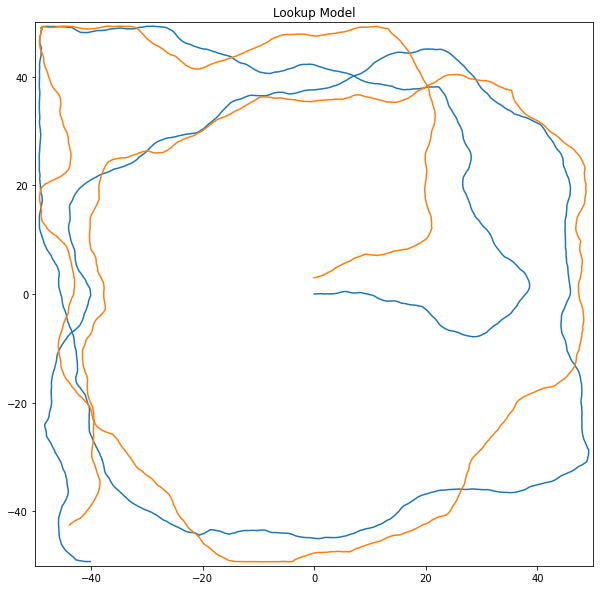

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.title("Lookup Model")
plt.xlim(-50,50)
plt.ylim(-50,50)
for fish_id in range(2):
    plt.plot(
        track[fish_id, :, 0],
        track[fish_id, :, 1],
        label="reconstructed",
    )

plt.show()